# Практическая работа №3: Регрессионный анализ
Выполнил студент гр.1374 Баснина Виктория. Вариант 2

## Цель работы
Ознакомление с основными положениями метода наименьших квадратов (МНК), со статистическими свойствами МНК-оценок, с понятием функции регрессии и роли МНК в регрессионном анализе.

## Основные теоретические положения
Введем матрицы 
$$
X = 
\left(
\begin{array}{cc}
f_1(x_1) & f_2(x_1) & \dots & f_n(x_1) \\
f_1(x_2) & f_2(x_2) & \dots & f_n(x_2) \\
\dots \\
f_1(x_m) & f_2(x_m) & \dots & f_n(x_m) \\
\end{array}
\right),
\qquad
y =
\left(
\begin{array}{c}
y_1 \\
y_2 \\
\vdots \\
y_m \\
\end{array}
\right),
\qquad
\beta =
\left(
\begin{array}{c}
\beta_1 \\
\beta_2 \\
\vdots \\
\beta_n
\end{array}
\right).
$$




$$
X\beta \approx y
$$
$$
\|X\beta - y\|_2^2 \to \min_{\beta}.
$$
Минимум нормы $\|X\beta - y\|_2$ совпадает с минимумом ее квадрата $\|X\beta - y\|_2^2$ (так как квадрат - функция монотонная для неотрицательного аргумента), но с $\|X\beta - y\|_2^2$ работать проще, так как здесь отсутствуют радикалы.

Равенство $X\beta \approx y$ означает, что мы желаем приближенно представить столбец $y$ в виде линейной комбинации столбцов матрицы $X$. Требование $\|X\beta - y\|_2 \to \min_{\beta}$ специфицирует, *что конкретно* означает здесь это *приближение* - минимизацию евклидовой нормы невязки $X\beta - y$.

Если бы систему $X\beta = y$ удавалось решить точно, то норма невязки равнялась бы нулю.
В этом случае график модельной зависимости проходил бы точно через заданные точки.
Однако, как правило, при аппроксимации данных получаемая с.л.у. $X\beta = y$ переопределена, т.е. не имеет решений.
Вектор $\beta$, на котором минимизируется евклидова норма  $\|X\beta - y\|_2$ называется *псевдорешением* системы $X\beta = y$.
Итак, решение линейной задачи наименьших квадратов есть псевдорешение системы $X\beta = y$.

Для нахождения решения задачи наименьших квадратов можно также найти все частные производные по каждому неизвестному параметру $\beta_1, \beta_2, \dots, \beta_n$ и приравнять их к нулю, как мы это делали для частного случая. Оказывается, мы придем к *системе нормальных уравнений* того же вида ($**$)
$$
(X^{\rm T} X)\, \beta = X^{\rm T} y. \tag{**}
$$
Псевдорешение системы $X\beta = y$ есть решение системы нормальных уравнений. 


По данным выборки отклонения $\varepsilon_i$, а, следовательно, и их дисперсия $\sigma^2$ неизвестны. Поэтому они заменяются наблюдаемыми остатками и их выборочной дисперсией. Несмещённой оценкой $\sigma^2$ является остаточная дисперсия $S^2=\cfrac{\sum_{i=1}^{n} e_i}{n-2}$

По выборке вычисляется $t_{набл}$.
Тогда  
‒ если $t_{набл}=0$ , то нет оснований для отклонения $H_0$ - основания считать, что величина Y не зависит от X (точнее связь
между этими двумя переменными далека от линейной зависимости);  
‒ иначе, $H_0$ отвергается в пользу $H_1$, что указывает на наличие определенной
линейной зависимости между Y и X.

## Постановка задачи
Результаты статистического эксперимента представлены в виде двух переменных. Требуется оценить характер (случайной) зависимости переменной Y от переменной X. Полученные результаты содержательно проинтерпретировать.

In [49]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import statistics as st
import scipy.stats as sc
from scipy.stats import chi2

**1) Построить графически результаты эксперимента. Сформулировать линейную регрессионую модель переменной Y по переменной X. Построить МНК оценки параметров сдвига $\beta_0$ и масштаба $\beta_1$. Построить полученную линию регрессии.**

50
b1= -0.20382600278298868    b0= 14.547662290519694
x_sr= 3.78
x_sr^2= 20.9
y_sr= 13.777200000000002
xy_sr= 50.7302
y* =  14.547662290519694   -0.20382600278298868 x


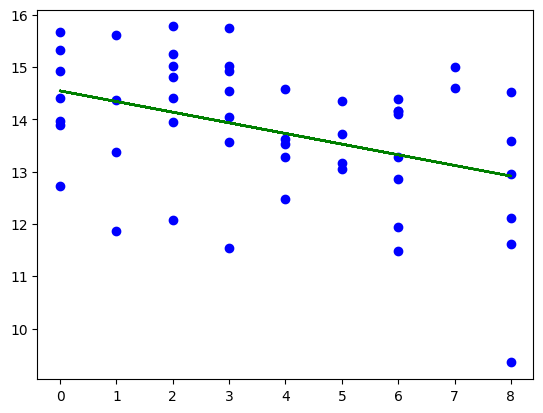

In [50]:
x = np.array([4, 8, 6, 7, 4, 5, 1, 2, 0, 6, 3, 1, 7, 4, 3, 2, 2, 8, 8, 6, 0, 3, 3, 8, 4, 3, 0, 6, 6, 0, 2, 5, 0, 6, 2, 0, 5, 3, 2, 8, 8, 1, 6, 1, 4, 2, 6, 3, 5, 0])
y=np.array([13.28, 14.52, 14.10, 15.01, 14.59, 13.73, 11.87, 12.08, 15.68, 14.39, 11.54, 13.37, 14.60, 13.53, 15.03, 15.03, 13.96,12.12, 9.35, 13.28, 12.72, 15.76, 14.92, 13.58, 13.62, 14.55, 13.97, 12.86, 14.17, 13.89, 14.41, 13.06, 14.42, 11.95, 15.26, 14.92, 13.16, 13.56, 15.78, 12.96, 11.62, 14.38, 11.49, 15.61, 12.47, 14.81, 14.17, 14.05, 14.35, 15.33])
alpha=0.1
n=len(x)
print(n)
x2=np.square(x)
xy=[a * b for a, b in zip(x, y)]
S1=np.sum(x)
S2=np.sum(x2)
sy=np.sum(y)
sxy=np.sum(xy)
X=np.array([[n,S1],[S1,S2]])
Y=np.array([sy,sxy])
X_obr=np.linalg.inv (X)
B=np.dot(X_obr, Y)
b0,b1=B
print ('b1=',b1, '   b0=',b0)
x_sr=S1/n
x_sr2=S2/n
y_sr=sy/n
xy_sr=sxy/n
print('x_sr=',x_sr)
print('x_sr^2=',x_sr2)
print('y_sr=',y_sr)
print('xy_sr=',xy_sr)
print ('y* = ',b0,' ',b1,'x')
y_new=[b0+b1*a for a in x]
plt.scatter(x,y,color='b')
plt.plot(x,y_new, color='green')
y_new_sr = np.sum(y_new)/n

**2) Построить и интерпретировать несмещенную оценку дисперсии. На базе ошибок построить гистограмму с шагом** $h=1.0$ **Проверить гипотезу нормальности ошибок на уровне значимости** $\alpha=0.1$ **по** $\mathcal{X^{2}}$ **Оценить расстояние полученной оценки до класса нормальных распределений по Колмогорову**

In [51]:
sigma_square = np.sum((y - y_new)**2)/(n-2)
print('sigma_square=',sigma_square)

sigma_square= 1.5048260181600017


По данным выборки отклонения $\varepsilon_i$, а, следовательно, и их дисперсия $\sigma^2$ неизвестны. Поэтому они заменяются наблюдаемыми остатками и их выборочной дисперсией. Несмещённой оценкой $\sigma^2$ является остаточная дисперсия $S^2=\cfrac{\sum_{i=1}^{n} e_i}{n-2}=1.505$.  

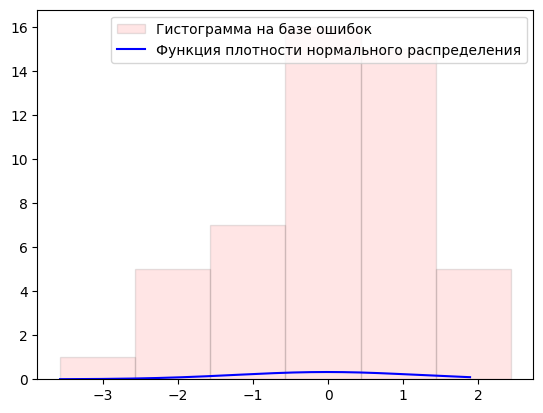

In [52]:
h=1.0
err=[]
for i in range(n-1):
    err.append(y[i]-y_new[i])
shag = np.arange(min(err), max(err) + h, h)
plt.hist(err, bins=shag,color='r',edgecolor='black', alpha=0.1, label='Гистограмма на базе ошибок')
k = np.linspace(min(err), max(err), 1000)
plt.plot(k, sc.norm.pdf(k, np.mean(err), np.std(err)), 'b',label='Функция плотности нормального распределения')
plt.legend()

In [53]:
I = [(-3.6, -2.6), (-2.6,-1.6), (-1.6,-0.6), (-0.6, 0.4),(0,4, 1.4),(1.4, 2.4)]
a0=0
sigma0=1.505
n_i = [1,5,7,16,15,5]
p_i = []
np_i = []
n_i_np_i = []
res = []
for i in I:
 p_i.append(round(sc.norm.cdf(i[1], loc=a0,scale=sigma0) - sc.norm.cdf(i[0], loc=a0,scale=sigma0), 6))
print(p_i)
for i in range (6):
 np_i.append(round(n*p_i[i],6))
print(np_i)
for i in range(6):
 n_i_np_i.append(round(n_i[i] - np_i[i], 6))
for i in range(5):
 res.append(round((n_i_np_i[i] ** 2) / np_i[i] , 6))
print(res, sum(res))
chi2_val_5_09 = chi2.ppf(1-alpha, 5)
print('chi2_val_5_09=',chi2_val_5_09)
print(1 - sc.chi2.cdf(sum(res), 5))
#lam=np.max(err)
#print ('lam_exp=',lam)
#print(1.22/np.sqrt(n))
sc.kstest(err, 'norm',args=(a0,sigma0))

[0.033654, 0.101831, 0.201205, 0.259728, 0.496067, 0.120734]
[1.6827, 5.09155, 10.06025, 12.9864, 24.80335, 6.0367]
[0.276983, 0.001646, 0.930904, 0.69933, 3.874705] 5.783568
chi2_val_5_09= 9.236356899781123
0.3278515959424133


KstestResult(statistic=0.11247365158523243, pvalue=0.5281209922647778, statistic_location=-0.4685322766047495, statistic_sign=-1)

$a_0=0.00 \:\sigma_0=1.505\:\alpha_2=0.1$  
$I_{1}=\left(-3.6, -2.6 \right], n_{1}=1$  
$P_{1}=0.034\: nP_{1}=1.683$  
$I_{2}=\left(-2.6,-1.6 \right], n_{2}=5$  
$P_{2}=0.102\: nP_{2}=5.092$  
$I_{3}=\left(-1.6,-0.6 \right], n_{3}=7$  
$P_{3}=0.201\: nP_{3}=10.060$  
$I_{4}=\left(-0.6, 0.4\right], n_{4}=16$  
$P_{4}=0.260\: nP_{4}=12.986$  
$I_{5}=\left(0,4, 1.4\right], n_{5}=15$  
$P_{5}=0.496\: nP_{5}=24.803$  
$I_{6}=\left(1.4, 2.4\right], n_{6}=5$  
$P_{6}=0.121\: nP_{6}=6.037$  
$\mathcal{X}^{2}_{N-1,1-\alpha_{1}}=\mathcal{X}^{2}_{5,0.9}\simeq 9.236$    
Критерий $\mathcal{X}^{2}: \mathcal{X}^{2}_{набл}=\sum_{i=1}^{6}\frac{(n_{i}-np_{i})^{2}}{np_{i}} =5.784$  
$\mathcal{X}^{2}< \mathcal{X}^{2}_{5,0.9}$ - гипотезу  не отвергаем (критерий Пирсона) - распределение нормальное   
$F^{-1}_{\mathcal{X}^2_5}(1-\alpha)=\mathcal{X}^2$    
$\alpha=1-F_{\mathcal{X}^2_5}(\mathcal{X}^2)=0.173$   
Был применен Kolmogorov-Smirnov тест для проверки нормальности распределения.  
Результат теста представляет собой кортеж, содержащий статистику теста и p-значение.  
Если p-значение меньше уровня значимости, то гипотеза о том, что данные имеют заданное распределение, отвергается.  
$p-value=0.528>\alpha_2=0.1$ - гипотезу не отвергаем  

**3) В предположении нормальности ошибок построить доверительные интервалы для параметров сдвига $\beta_0$ и масштаба $\beta_1$ уровня доверия $1-\alpha$. Построить доверительный эллипс уровня $1-\alpha$ (вычислить его полуоси)**

In [54]:
dx_square = np.sum((x-x_sr)**2)
b1_err = np.sqrt(sigma_square/dx_square)
b0_err = np.sqrt(sigma_square*(x_sr**2/(n*dx_square)))
b1_conf = sc.t.interval(1-alpha, df = n-2, loc=b1, scale=b1_err)
b0_conf = sc.t.interval(1-alpha, df = n-2, loc=b0, scale=b0_err)
print(f"b1 = {b1:0.4f}, α=10% [{b1_conf[0]:0.4f} ; {b1_conf[1]:0.4f}]")
print(f"b0 = {b0:0.4f}, α=10% [{b0_conf[0]:0.4f} ; {b0_conf[1]:0.4f}]")
b1 = np.repeat(b1, len(err))
cov_matrix = np.cov(np.column_stack((err, b1)))
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
cov = np.cov(x, y)
chi2_val = chi2.ppf(1-alpha, 2)
print('chi2_val_2_0.9=',chi2_val)
a = np.sqrt(eigenvalues[0] * chi2_val)
b = np.sqrt(eigenvalues[1] * chi2_val)
print ('Значение полуосей доверительного эллипса')
print('a=',a,'b=',b)

b1 = -0.2038, α=10% [-0.3170 ; -0.0907]
b0 = 14.5477, α=10% [14.4872 ; 14.6082]
chi2_val_2_0.9= 4.605170185988092
Значение полуосей доверительного эллипса
a= 0j b= (12.994739701484491+0j)


**4) Cформулировать гипотезу независимости переменной Y от X. Провести проверку значимости.**

In [55]:
t_b1_0=abs(b1/b1_err)
print ('t_b1_0=',t_b1_0[0])

t_b1_0= 3.021027854457437


По выборке вычисляется $t_{набл}=\cfrac{b_1}{S_{b1}}$.
Тогда  
‒ если $t_{набл}=0$ , то нет оснований для отклонения $H_0$ - основания считать, что величина Y не зависит от X (точнее связь
между этими двумя переменными далека от линейной зависимости);  
‒ иначе, $H_0$ отвергается в пользу $H_1$, что указывает на наличие определенной
линейной зависимости между Y и X.  
$3.021\neq 0$ $H_0$ отвергается в пользу $H_1$, а именно, Y зависит от X.

**5) Сформулировать модель, включающую дополнительный член $X^2$. Построить МНК оценки параметров  $\beta_0$, $\beta_1$ и $\beta_2$. Изобразить графически полученную регрессионную зависимость**

beta0= 14.323899197129796 beta1= -0.005391849459805443 beta2= -0.025182679721136095
y* =  14.323899197129796   -0.005391849459805443 x  -0.025182679721136095 x^2


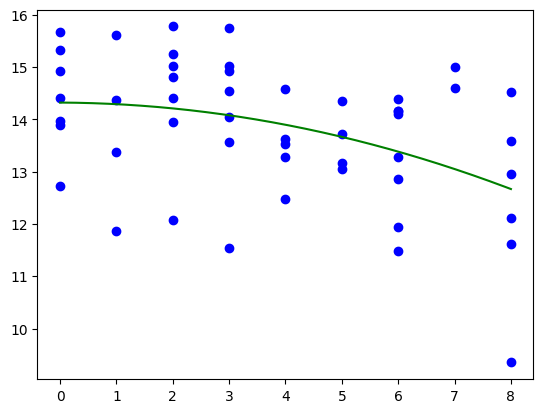

In [56]:
x3=[]
x4=[]
for i in x:
    x3.append(i**3)
    x4.append(i**4)
S3=np.sum(x3)
S4=np.sum(x4)
sy=np.sum(y)
sxy=np.sum(xy)
xy2=[a * b for a, b in zip(x2, y)]
sxy2=np.sum(xy2)
X=np.array([[n,S1,S2],[S1,S2,S3],[S2,S3,S4]])
Y=np.array([sy,sxy,sxy2])
X_obr=np.linalg.inv (X)
B=np.dot(X_obr, Y)
beta0, beta1,beta2 = B
print('beta0=',beta0,'beta1=',beta1,'beta2=',beta2)
xx = np.linspace(0, 8, 1000)
y_new_2=[beta0+beta1*a+beta2*a*a for a in x]
plt.scatter(x,y,color='b')
plt.plot(xx,beta0+beta1*xx+beta2*xx**2, color='green')
print ('y* = ',beta0,' ',beta1,'x ',beta2, 'x^2')

**6) Построить и интерпретировать несмещенную оценку дисперсии. На базе ошибок построить гистограмму с шагом** $h=1.0$ **Проверить гипотезу нормальности ошибок на уровне значимости** $\alpha=0.1$ **по** $\mathcal{X^{2}}$ **Оценить расстояние полученной оценки до класса нормальных распределений по Колмогорову**

In [57]:
sigma_square_2 = np.sum((y - y_new_2)**2)/(n-3)
print('sigma_square=',sigma_square_2)

sigma_square= 1.5119836559361959


По данным выборки отклонения $\varepsilon_i$, а, следовательно, и их дисперсия $\sigma^2$ неизвестны. Поэтому они заменяются наблюдаемыми остатками и их выборочной дисперсией. Несмещённой оценкой $\sigma^2$ является остаточная дисперсия $S^2=\cfrac{\sum_{i=1}^{n} e_i}{n-3}=1.511$. 

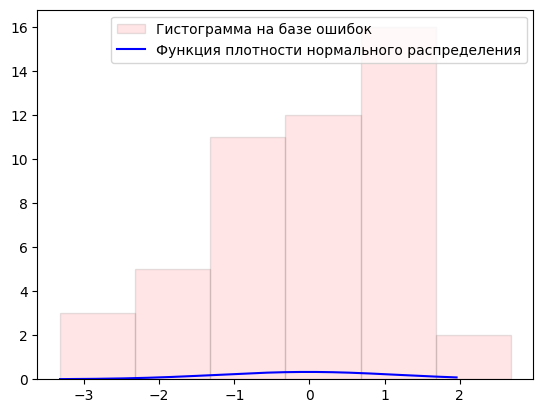

In [58]:
err_2=[]
for i in range(n-1):
    err_2.append(y[i]-y_new_2[i])
shag = np.arange(min(err_2), max(err_2) + h, h)
plt.hist(err_2, bins=shag,color='r',edgecolor='black', alpha=0.1, label='Гистограмма на базе ошибок')
k = np.linspace(min(err_2), max(err_2), 1000)
plt.plot(k, sc.norm.pdf(k, np.mean(err_2), np.std(err_2)), 'b',label='Функция плотности нормального распределения')
plt.legend()

In [59]:
I = [(-4.94, -3.94), (-3.94,-2.94), (-2.94,-1.94), (-1.94, -0.94),(-0.94, 0.069),(0.069, 1.069),(1.069,2.069)]
a0=np.sum(err_2)/n
sigma0=1.48
n_i = [1,0,7,9,14,14,4]
p_i = []
np_i = []
n_i_np_i = []
res = []
for i in I:
 p_i.append(round(sc.norm.cdf(i[1], loc=a0,scale=sigma0) - sc.norm.cdf(i[0], loc=a0,scale=sigma0), 7))
print(p_i)
for i in range (7):
 np_i.append(round(n*p_i[i],7))
print(np_i)
for i in range(7):
 n_i_np_i.append(round(n_i[i] - np_i[i], 7))
for i in range(7):
 res.append(round((n_i_np_i[i] ** 2) / np_i[i] , 7))
print(res, sum(res))
chi2_val_6_09 = chi2.ppf(1-alpha, 6)
print('chi2_val_6_09=',chi2_val_6_09)
print(1 - sc.chi2.cdf(sum(res), 6))
#lam=np.max(err_2)/np.sqrt(n)
#print ('lam=',lam)
#print(1.22/np.sqrt(n))
sc.kstest(err_2, 'norm',args=(a0,sigma0))

[0.0035984, 0.0202123, 0.0730246, 0.1698438, 0.2568864, 0.2450933, 0.1518594]
[0.17992, 1.010615, 3.65123, 8.49219, 12.84432, 12.254665, 7.59297]
[3.7379458, 1.010615, 3.0713651, 0.0303657, 0.1039834, 0.2485743, 1.7001823] 9.903031599999998
chi2_val_6_09= 10.644640675668422
0.12879541411659556


KstestResult(statistic=0.13868520756880054, pvalue=0.27624710934069774, statistic_location=-0.6194089237523972, statistic_sign=-1)

$a_0=0.00 \:\sigma_0=1.48\:\alpha_2=0.1$  
$I_{1}=\left(-4.94, -3.94 \right], n_{1}=1$  
$P_{1}=0.004\: nP_{1}=0.180$  
$I_{2}=\left(-3.94,-2.94 \right], n_{2}=0$  
$P_{2}=0.020\: nP_{2}=1.011$  
$I_{3}=\left(-2.94,-1.94 \right], n_{3}=7$  
$P_{3}=0.073\: nP_{3}=3.651$  
$I_{4}=\left(-1.94, -0.94\right], n_{4}=9$  
$P_{4}=0.170\: nP_{4}=8.492$  
$I_{5}=\left(-0.94, 0.069\right], n_{5}=14$  
$P_{5}=0.257\: nP_{5}=12.844$  
$I_{6}=\left(0.069, 1.069\right], n_{6}=14$  
$P_{6}=0.245\: nP_{6}=12.255$  
$I_{7}=\left(1.069,2.069\right], n_{}=4$  
$P_{7}=0.152\: nP_{7}=7.593$  
$\mathcal{X}^{2}_{N-1,1-\alpha_{1}}=\mathcal{X}^{2}_{6,0.9}\simeq 10.645$    
Критерий $\mathcal{X}^{2}: \mathcal{X}^{2}_{набл}=\sum_{i=1}^{7}\frac{(n_{i}-np_{i})^{2}}{np_{i}} =9.903$  
$\mathcal{X}^{2}< \mathcal{X}^{2}_{6,0.9}$ - гипотезу  не отвергаем (критерий Пирсона) - распределение нормальное   
$F^{-1}_{\mathcal{X}^2_6}(1-\alpha)=\mathcal{X}^2$    
$\alpha=1-F_{\mathcal{X}^2_6}(\mathcal{X}^2)=0.129$   
Был применен Kolmogorov-Smirnov тест для проверки нормальности распределения.  
Результат теста представляет собой кортеж, содержащий статистику теста и p-значение.  
Если p-значение меньше уровня значимости, то гипотеза о том, что данные имеют заданное распределение, отвергается.  
$p-value=0.276>\alpha_2=0.1$ - гипотезу не отвергаем  

**7 В предположении нормальности ошибок построить доверительные интервалы для параметров сдвига $\beta_0$,$\beta_1$,$\beta_2$ уровня доверия $1-\alpha$. Написать уравнение доверительный эллипсоида уровня $1-\alpha$**

In [60]:
X = np.column_stack((np.ones_like(x), x, x2))
cov_matrix = sigma_square * np.linalg.inv(X.T @ X)
std_err = np.sqrt(np.diag(cov_matrix))
beta1_conf = sc.t.interval(1-alpha, df = n-2, loc=beta1, scale=std_err[1])
beta0_conf = sc.t.interval(1-alpha, df = n-2, loc=beta0, scale=std_err[0])
beta2_conf = sc.t.interval(1-alpha, df = n-2, loc=beta2, scale=std_err[2])
print(f"b1 = {beta1:0.4f}, α=10% [{beta1_conf[0]:0.4f} ; {beta1_conf[1]:0.4f}]")
print(f"b0 = {beta0:0.4f}, α=10% [{beta0_conf[0]:0.4f} ; {beta0_conf[1]:0.4f}]")
print(f"b2 = {beta2:0.4f}, α=10% [{beta2_conf[0]:0.4f} ; {beta2_conf[1]:0.4f}]")
F_value = sc.f.ppf(1 - alpha, 3, n - 3)
polyosi = np.sqrt(F_value) * np.sqrt(np.diag(cov_matrix))
print("Уравнение доверительного эллипсоида:")
print(f"(({beta0} - x) / {polyosi[0]})**2+({beta1} - y) / {polyosi[1]})**2 + (({beta2} - z) / {polyosi[2]})**2 = 1")

b1 = -0.0054, α=10% [-0.3997 ; 0.3889]
b0 = 14.3239, α=10% [13.6538 ; 14.9940]
b2 = -0.0252, α=10% [-0.0731 ; 0.0228]
Уравнение доверительного эллипсоида:
((14.323899197129796 - x) / 0.5931621451587805)**2+(-0.005391849459805443 - y) / 0.3490197907836035)**2 + ((-0.025182679721136095 - z) / 0.04242969506383638)**2 = 1


Уравнение доверительного эллипсоида:  
$\cfrac{(14.3239-x)^2}{0.5931^2}+\cfrac{(-0.0054-y)^2}{0.3490^2}+\cfrac{(-0.0252-z)^2}{0.0424^2} = 1$

**8) Cформулировать гипотезу независимости переменной Y от X. Провести проверку значимости.**

In [61]:
t_b1_0=abs(beta1/std_err[1])
t_b2_0=abs(beta2/std_err[2])
print ('t_b1_0=',t_b1_0,'t_b2_0=',t_b2_0)

t_b1_0= 0.022935671970755103 t_b2_0= 0.8811620726048058


По выборке вычисляется $t_{b1}=\cfrac{b_1}{S_{b1}}$, $t_{b2}=\cfrac{b_2}{S_{b2}}$.
Тогда  
‒ если $t_{b1}=0$ и $t_{b2}=0$  , то нет оснований для отклонения $H_0$ - основания считать, что величина Y не зависит от X (точнее связь
между этими двумя переменными далека от линейной зависимости);  
‒ иначе, $H_0$ отвергается в пользу $H_1$, что указывает на наличие определенной
линейной зависимости между Y и X.  
$0.0229\neq 0$, $0.8812\neq 0$ -  $H_0$ отвергается в пользу $H_1$, а именно, Y зависит от X.

## Выводы
В ходе выполнения практической работы ознакомились с основными положениями метода наименьших квадратов (МНК), со статистическими свойствами МНК-оценок, с понятием функции регрессии и роли МНК в регрессионном анализе. Также изучили некоторые функции библиотек Scipy, Matplotlib языка Python.